# Predicting Number of Comments for Blogs ##

In this assignment, we will work on blog posts. The deadline is ** Nov. 19 5pm **. The goal is to determine the number of comments a post will receive in the next 24 hours. You can find the details of the dataset [here](https://drive.google.com/a/bu.edu/file/d/19p7QBjH2Ai37MJcixiQ5UKlC0kw9l2Yd/view?usp=sharing). The data are stored in .csv files and each row of the dataset corresponds to a distinct blog (data instance). 

For information regarding the dataset and the features included in it please refer to the included README.md file.

As learned in class most algorithms can only handle numeric values so we provided a dataset containing numeric values. The algorithms you are going to evaluate are the following: 1) Linear Regression, 2) Logistic Regression, 3) KNN, 4) Decision Tree Classifiers. Tasks 1 and 2 are related to regression to analyze this information, while tasks 3 and 4 are related to classification.

Relevant Papers/citations:
1) Buza, K. (2014). Feedback Prediction for Blogs. In Data Analysis, Machine Learning and Knowledge Discovery (pp. 145-152). Springer International Publishing.
2) BlogFeedback Data Set UCI Machine Learning Repository

### Task 1

First, we will fit a linear regression model that predicts the number of comments a post will receive. Use the model to analyze the important factors that decide the number of comments of a blog. 

1. Report the results of your linear regression model (error, factors, e.t.c.) for the test datasets a) blogData_test-2012.02.csv b) blogData_test-2012.03.csv ** (10 points) **
2. Provide a brief report explaining a) how did you address overfitting, b) interpretation of the linear regression model results, c) compare the results for the two test datasets and mention any interesting observations ** (5 points) **

Total: ** (15 points) **


In [128]:
import csv
import numpy as np 
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge
import os
import copy
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.datasets import load_diabetes, load_digits
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree

In [205]:
# Reading data
df_train = pd.read_csv('BlogData/blogData_train.csv')
df_test1 = pd.read_csv('BlogData/blogData_test-2012.02.csv')
df_test2 = pd.read_csv('BlogData/blogData_test-2012.03.csv')
df_train.head()

,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0.1,377.0,3.0,...,0.0.229,1.0.1,0.0.230,0.0.231,0.0.232,0.0.233,0.0.234,0.0.235,0.0.236,1.0.2
0,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0
4,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [207]:
df_train = df_train.iloc[np.random.permutation(len(df_train))]
df_test1 = df_train.iloc[np.random.permutation(len(df_test1))]
df_test2 = df_train.iloc[np.random.permutation(len(df_test2))]
df_train.head()

,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0.1,377.0,3.0,...,0.0.229,1.0.1,0.0.230,0.0.231,0.0.232,0.0.233,0.0.234,0.0.235,0.0.236,1.0.2
39999,13.888889,13.633655,1.0,34.0,8.0,4.888889,9.146274,0.0,30.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
28998,41.764988,84.531746,0.0,498.0,4.0,14.218226,51.456350,0.0,497.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
44478,65.052180,116.142780,0.0,442.0,3.0,23.947826,69.082535,0.0,395.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50610,0.420290,1.013042,0.0,5.0,0.0,0.202899,0.553767,0.0,3.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
8366,16.593575,19.671364,1.0,144.0,10.0,6.512450,11.051215,0.0,111.0,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,13.0


In [298]:
X_tst1 = df_test1.iloc[:, 0:279]
Y_tst1 = df_test1.iloc[:, 280]
X_tst2 = df_test2.iloc[:, 0:279]
Y_tst2 = df_test2.iloc[:, 280]
X_trn = df_train.iloc[:, 0:279]
Y_trn = df_train.iloc[:, 280]
X_trn = df_train.iloc[:, 0:279]
Y_trn = df_train.iloc[:, 280]

from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import Normalizer
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
X_trn = sel.fit_transform(X_trn)
X_tst1 = sel.fit_transform(X_tst1)
X_tst2 = sel.fit_transform(X_tst2)

from sklearn.decomposition import TruncatedSVD
lsa = TruncatedSVD(65, algorithm = 'randomized')
X_trn = lsa.fit_transform(X_trn)
# normalize category columns and rescale to give location a larger weight
X_trn = Normalizer(copy=False).fit_transform(X_trn)


X_tst1 = lsa.fit_transform(X_tst1)
# normalize category columns and rescale to give location a larger weight
X_tst1 = Normalizer(copy=False).fit_transform(X_tst1)

X_tst2 = lsa.fit_transform(X_tst2)
# normalize category columns and rescale to give location a larger weight
X_tst2 = Normalizer(copy=False).fit_transform(X_tst2)


In [299]:
model = sm.OLS(Y_trn, X_trn)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  1.0.2   R-squared:                       0.379
Model:                            OLS   Adj. R-squared:                  0.378
Method:                 Least Squares   F-statistic:                     498.6
Date:                Fri, 17 Nov 2017   Prob (F-statistic):               0.00
Time:                        13:16:07   Log-Likelihood:            -2.5289e+05
No. Observations:               52396   AIC:                         5.059e+05
Df Residuals:                   52332   BIC:                         5.065e+05
Df Model:                          64                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            -0.7813      0.212     -3.681      0.0

Mean Square Error of 1st Sample is 1468.43126036
Mean Square Error of 2nd Sample is 1554.12539057


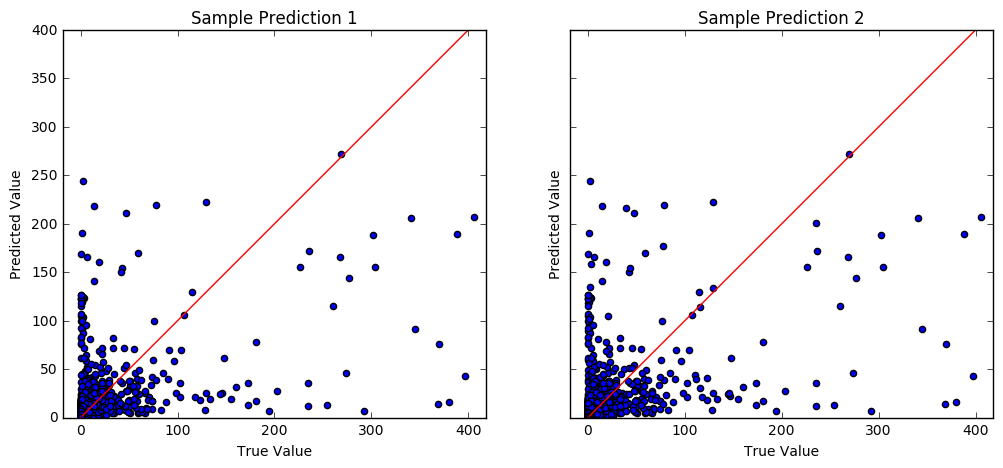

In [300]:
%matplotlib inline 
from sklearn.metrics import mean_squared_error
fig, (ax1, ax2) = plt.subplots(1,2,sharey = 'row',figsize=(12,5))
y_predict1 = results.predict(X_tst1)
ax1.scatter(Y_tst1, y_predict1)
ax1.set_xlabel('True Value')
ax1.set_ylabel('Predicted Value')
ax1.plot([0,400],[0,400],'r-')
ax1.axis('equal')
ax1.set_ylim([0,400])
ax1.set_xlim([0,400])
ax1.set_title('Sample Prediction 1')
#
y_predict2 = results.predict(X_tst2)
ax2.scatter(Y_tst2, y_predict2)
ax2.set_xlabel('True Value')
ax2.set_ylabel('Predicted Value')
ax2.plot([0,400],[0,400],'r-')
ax2.axis('equal')
ax2.set_ylim([0,400])
ax2.set_xlim([0,400])
ax2.set_title('Sample Prediction 2');

MSE_test1 = mean_squared_error(Y_tst1, y_predict1)
print("Mean Square Error of 1st Sample is", MSE_test1)
MSE_test2 = mean_squared_error(Y_tst2, y_predict2)
print("Mean Square Error of 2nd Sample is", MSE_test2)

### Report

**(a) I addressed overfitting by cross validation. Partitioning your data is one way to assess how the model fits observations that weren't used to estimate the model.**

**(b) The R^2 value is really low which shows that the model isn't a good fit. I tried to improve the model by removing the columns which are correlated and using SVD. But could increase it to a certain value. **

**(c) The results of both datasets are almost the same. R squared values are low and the mean square error is too high.**

### Task 2

Next, we will fit a logistic regression model that decides if a blog post is popular or not. In order to do so, note that you need to define a binary attribute on which you can fit the logistic regression model. As before, use the model to analyze the data.

1. Report the results of your linear regression model (error, factors, e.t.c.) for the test datasets a) blogData_test-2012.02.csv b) blogData_test-2012.03.csv ** (10 points) **
2. Provide a brief report explaining a) how did you define the binary attribute, b) interpretation of the logistic regression model results, c) compare the results for the two test datasets and mention any interesting observations ** (5 points) **

Total: ** (15 points) **

In [49]:
df_train2 = pd.read_csv('BlogData/blogData_train.csv')
df_test11 = pd.read_csv('BlogData/blogData_test-2012.02.csv')
df_test22 = pd.read_csv('BlogData/blogData_test-2012.03.csv')
X_trn2 = df_train2.iloc[:, 0:279]
Y_trn2 = df_train2.iloc[:, 280]
Y_mean = np.mean(Y_trn2)
Y_mean

6.764829376288266

In [266]:
X_tst11 = df_test1.iloc[:, 0:279]
Y_tst11 = df_test1.iloc[:, 280]
X_tst22 = df_test2.iloc[:, 0:279]
Y_tst22 = df_test2.iloc[:, 280]
Y_tst11 = np.where(Y_tst1 > 6, 1,0)
Y_tst22 = np.where(Y_tst2 > 6, 1,0)

In [267]:
Y_trn2 = df_train2.iloc[:, 280].astype(float)
Y_trn2 = np.where(Y_trn2 > 6, 1,0)
Y_trn2[3]

1

In [268]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
X_trn2 = sel.fit_transform(X_trn2)
X_tst11 = sel.fit_transform(X_tst11)
X_tst22 = sel.fit_transform(X_tst22)
print(X_trn2.shape, X_tst11.shape)

(52396, 67) (3502, 67)


In [269]:
logit = sm.Logit(Y_trn2, X_trn2)
result2 = logit.fit( method = 'lbfgs', maxiter = 35, missing='drop')

In [270]:
print(result2.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                52396
Model:                          Logit   Df Residuals:                    52332
Method:                           MLE   Df Model:                           63
Date:                Fri, 17 Nov 2017   Pseudo R-squ.:                 -0.9388
Time:                        00:32:58   Log-Likelihood:                -36318.
converged:                       True   LL-Null:                       -18733.
                                        LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1                  0      0.014          0      1.000        -0.028     0.028
x2                  0      0.012          0      1.000        -0.023     0.023
x3                  0   1.57e+06          0      1.0

In [272]:
from sklearn.metrics import mean_squared_error
y_predict11 = result2.predict(X_tst11)
y_predict22 = result2.predict(X_tst22)
MSE_test1 = mean_squared_error(Y_tst11, y_predict11)
print("Mean Square Error of 1st Sample is", MSE_test1)
MSE_test2 = mean_squared_error(Y_tst22, y_predict22)
print("Mean Square Error of 2nd Sample is", MSE_test2)

Mean Square Error of 1st Sample is 0.25
Mean Square Error of 2nd Sample is 0.25


In [273]:
def evaluate(y_train, X_train, y_test, X_test, threshold):
    # learn model on training data
    logit = sm.Logit(y_train, X_train)
    result = logit.fit(disp=False)
    # make probability predictions on test data
    y_pred = result.predict(X_test)
    # threshold probabilities to create classifications
    y_pred = y_pred > threshold
    # report metrics
    precision = metrics.precision_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    return precision, recall

precision1, recall1 = evaluate(Y_trn2, X_trn2, Y_tst11, X_tst11, 0.5)
precision2, recall2 = evaluate(Y_trn2, X_trn2, Y_tst22, X_tst22, 0.5)

print('Precision: {:0.3f}, Recall: {:0.3f}'.format(precision1,recall1))
print('Precision: {:0.3f}, Recall: {:0.3f}'.format(precision2,recall2))

import warnings
warnings.filterwarnings("ignore")

Precision: 0.742, Recall: 0.440
Precision: 0.734, Recall: 0.439


### Report

**(a) The binary attribute I defined was the last column which is the target which I want to predict i.e. the number of comments received in the next 24 hours with respect to the base time. Conversion to binary was done using the mean value of the comments so the blogs which have > 6 comments are considered to be popular (1) and the ones which have comments < 6 are considered to be unpopular (0). **

**(b)  Notice that almost all of our independent variables are considered significant (very few confidence intervals contain zero). I tried to improve the model by removing the columns which are correlated.**

**(c) The prediction results which include the Mean Square Error, Precision and Recall for the two datasets are almost identical. Precision is the fraction of "yes"es that are correct and Recall is the fraction of admits that we say "yes" to**

### Task 3

Now, we are going to use the K-Nearest Neighbors Classifier to decide if a blog post is popular or not. Please use the same popularity definition as in task 2, for this task. KNN is an instant-based classification which simply stores instances of the training data. Then, classification is computed from a majority vote of the nearest neighbors of each point.

1. Report the accuracy of your prediction for the test datasets a) blogData_test-2012.02.csv b) blogData_test-2012.03.csv ** (10 points) **
2. Provide a brief report explaining a) how did you define the nearest neighbors, b) interpretation of the KNN results, c) compare the results for the two test datasets and mention any interesting observations (5 points)

Total: ** (15 points) **

In [64]:
X_trn_knn = df_train.iloc[:, 0:279]
Y_trn_knn = df_train.iloc[:, 280]
X_tst1_knn = df_test1.iloc[:, 0:279]
Y_tst1_knn = df_test1.iloc[:, 280]
X_tst2_knn = df_test2.iloc[:, 0:279]
Y_tst2_knn = df_test2.iloc[:, 280]
Y_trn_knn = np.where(Y_trn_knn > 6, 1,0)
Y_tst1_knn = np.where(Y_tst1_knn > 6, 1,0)
Y_tst2_knn = np.where(Y_tst2_knn > 6, 1,0)
print('Shape of data: {}'.format(X_trn_knn.shape))
print('Unique labels: {}'.format(np.unique(Y_trn_knn)))


Shape of data: (52396, 279)
Unique labels: [0 1]


In [126]:
k = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
acc1 = []
acc2 = []
for i in k:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_trn_knn,Y_trn_knn)
    y_pred_test1_knn = knn.predict(X_tst1_knn)
    y_pred_test2_knn = knn.predict(X_tst2_knn)
    print('k =', i)
    print('Accuracy on test data 1: {}'.format(knn.score(X_tst1_knn, Y_tst1_knn)))
    print('Accuracy on test data 2: {}'.format(knn.score(X_tst2_knn, Y_tst2_knn)))
    print("#"*50)
    acc1.append(knn.score(X_tst1_knn, Y_tst1_knn))
    acc2.append(knn.score(X_tst2_knn, Y_tst2_knn))

k = 1
Accuracy on test data 1: 0.9997144488863506
Accuracy on test data 2: 0.999757281553398
##################################################
k = 2
Accuracy on test data 1: 0.9614505996573387
Accuracy on test data 2: 0.9592233009708738
##################################################
k = 3
Accuracy on test data 1: 0.9580239862935466
Accuracy on test data 2: 0.9575242718446602
##################################################
k = 4
Accuracy on test data 1: 0.9440319817247287
Accuracy on test data 2: 0.941990291262136
##################################################
k = 5
Accuracy on test data 1: 0.9423186750428326
Accuracy on test data 2: 0.9422330097087379
##################################################
k = 6
Accuracy on test data 1: 0.9354654483152485
Accuracy on test data 2: 0.9354368932038835
##################################################
k = 7
Accuracy on test data 1: 0.9377498572244432
Accuracy on test data 2: 0.9376213592233009
######################################

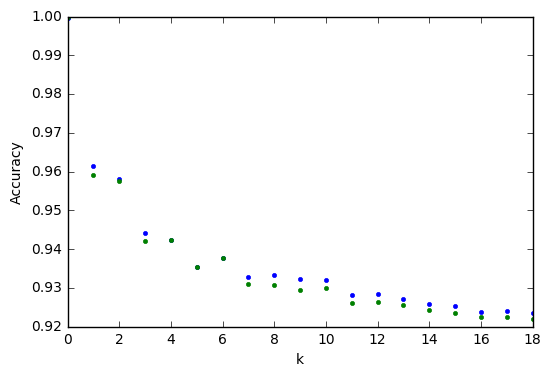

In [127]:
plt.plot(acc1,'.')
plt.plot(acc2,'.')
plt.xlabel('k')
_=plt.ylabel('Accuracy')

### Report

**(a) The nearest neighbors were decided after trying different values. The points are in a 280 dimensional plane. The number of points is reasonably large. This means that the density of the plane at any point is fairly high. In other words, within any subspace there is adequate number of points. The best accuracy was achieved at k=1 for both the test datasets. The test accuracys were plotted for both test datasets on different K-values. Above is the curve for the testing error rate with varying value of K.**

**(b) The accuracy for both test data is greater at k = 1 and it decreases as we increase the value of k **

**(c) The results of both datasets are somewhat similar at different k values and their difference is greater at higher values of k **

### Task 4

Finally, we are going to use the Decision Trees Classifier to decide if a blog post is popular or not. Please use the same popularity definition as in tasks 2,3, for this task. In order to construct a Decision Tree you will need to discretize some of the attributes.

1. Report the accuracy of your prediction for the test datasets a) blogData_test-2012.02.csv b) blogData_test-2012.03.csv ** (10 points) **
2. Provide a brief report explaining a) which attributes did you discretize and how, b) interpretation of the Decision Tree Classifier results, c) compare the results for the two test datasets and mention any interesting observations (5 points)

Total: ** (15 points) **

In [123]:
dtc = tree.DecisionTreeClassifier()
dtc.fit(X_trn_knn,Y_trn_knn)
y_pred_test = dtc.predict(X_tst1_knn)
print('DT accuracy on 1st test data: ', dtc.score(X_tst1_knn, Y_tst1_knn))
y_pred_test = dtc.predict(X_tst2_knn)
print('DT accuracy on 2nd test data: ', dtc.score(X_tst2_knn, Y_tst2_knn))

DT accuracy on 1st test data:  0.999714448886
DT accuracy on 2nd test data:  0.999514563107


In [122]:
y_pred_train = dtc.predict(X_trn_knn)
print('DT accuracy on training data: ', dtc.score(X_trn_knn, Y_trn_knn))

DT accuracy on training data:  0.999141155813


### Report

**(a) The newer version of algorithm removed the restriction that features must be categorical by dynamically defining a discrete attribute (based on numerical variables) that partitions the continuous attribute value into a discrete set of intervals.  **

**(b) The accuracy of the decision tree classifier for both the test datasets is the same which shows that the model is a good fit**

**(c) The model fits better on the first dataset **